In [19]:
import xgboost as xgb
import pandas as pd
import operator
from matplotlib import pylab as plt
from pylab import *
from imblearn.over_sampling import RandomOverSampler

df=pd.read_csv("icd10_Oct_7_flag.csv",encoding="gbk")
df.head()

,Unnamed: 0,eid,p41270,ALT,Albumin,Alkaline phosphatase,ApoA,ApoB,AST,C-reactive protein,...,SHBG,Sodium in urine,Testosterone,Total bilirubin,Total protein,Triglycerides,Urate,Urea,VD,flag
0,0,5155904,R87.6 Abnormal cytological findings|eczema/der...,11.61,44.62,58.3,1.612,0.776,18.0,1.81,...,75.27,32.5,0.877,7.18,71.28,1.677,281.6,4.84,109.0,0
1,1,5551888,E11.9 Without complications|E78.0 Pure hyperch...,23.24,44.45,78.5,1.397,1.022,25.1,0.59,...,23.27,123.9,15.640,9.15,76.82,0.803,334.1,3.05,39.4,0
2,2,4051692,D50.8 Other iron deficiency anaemias|F05.9 Del...,22.18,45.65,111.4,1.496,1.140,26.7,2.12,...,54.07,31.7,0.687,5.99,72.55,2.006,220.6,4.66,46.8,0
3,3,2293266,J32.8 Other chronic sinusitis|J33.9 Nasal poly...,24.61,41.70,110.3,1.142,0.799,27.8,5.15,...,26.26,179.3,8.990,8.90,70.65,1.769,376.7,3.89,22.2,0
4,4,3062055,K80.2 Calculus of gallbladder without cholecys...,28.28,45.62,69.3,1.324,1.231,64.9,2.31,...,32.42,107.4,9.275,33.14,69.07,2.656,331.1,9.26,39.6,0


In [20]:
df.isnull().sum()

Unnamed: 0                    0
eid                           0
p41270                        0
ALT                       31351
Albumin                   68624
Alkaline phosphatase      31169
ApoA                      71052
ApoB                      33453
AST                       32879
C-reactive protein        32161
Ca                        68760
Cholestero                31182
Creatinine                31407
Creatinine in urine       17233
Cystatin C                31211
Direct bilirubin          98798
γ-glutamyltransferase     31423
Glucose                   69111
HbA1c                     33999
HDL cholesterol           68809
IGF-1                     33605
LDL cholesterol          364101
Lipoprotein A            120426
Microalbumin in urine    329346
Phosphate                 69416
Potassium in urine        18191
SHBG                      72660
Sodium in urine           18233
Testosterone              74011
Total bilirubin           33110
Total protein             69067
Triglyce

In [21]:
df.shape

(475817, 36)

In [22]:
leng=len(df["eid"])
df.dropna(axis=1,thresh=1*leng/3,inplace=True)
df.head()

,Unnamed: 0,eid,p41270,ALT,Albumin,Alkaline phosphatase,ApoA,ApoB,AST,C-reactive protein,...,SHBG,Sodium in urine,Testosterone,Total bilirubin,Total protein,Triglycerides,Urate,Urea,VD,flag
0,0,5155904,R87.6 Abnormal cytological findings|eczema/der...,11.61,44.62,58.3,1.612,0.776,18.0,1.81,...,75.27,32.5,0.877,7.18,71.28,1.677,281.6,4.84,109.0,0
1,1,5551888,E11.9 Without complications|E78.0 Pure hyperch...,23.24,44.45,78.5,1.397,1.022,25.1,0.59,...,23.27,123.9,15.640,9.15,76.82,0.803,334.1,3.05,39.4,0
2,2,4051692,D50.8 Other iron deficiency anaemias|F05.9 Del...,22.18,45.65,111.4,1.496,1.140,26.7,2.12,...,54.07,31.7,0.687,5.99,72.55,2.006,220.6,4.66,46.8,0
3,3,2293266,J32.8 Other chronic sinusitis|J33.9 Nasal poly...,24.61,41.70,110.3,1.142,0.799,27.8,5.15,...,26.26,179.3,8.990,8.90,70.65,1.769,376.7,3.89,22.2,0
4,4,3062055,K80.2 Calculus of gallbladder without cholecys...,28.28,45.62,69.3,1.324,1.231,64.9,2.31,...,32.42,107.4,9.275,33.14,69.07,2.656,331.1,9.26,39.6,0


In [85]:
data=df.iloc[:,3:33]
label=df['flag']
col=data.columns
col

Index(['ALT', 'Albumin', 'Alkaline phosphatase', 'ApoA', 'ApoB', 'AST',
       'C-reactive protein', 'Ca', 'Cholestero', 'Creatinine',
       'Creatinine in urine', 'Cystatin C', 'Direct bilirubin',
       'γ-glutamyltransferase', 'Glucose', 'HbA1c', 'HDL cholesterol', 'IGF-1',
       'Lipoprotein A', 'Phosphate', 'Potassium in urine', 'SHBG',
       'Sodium in urine', 'Testosterone', 'Total bilirubin', 'Total protein',
       'Triglycerides', 'Urate', 'Urea', 'VD'],
      dtype='object')

In [86]:
for s in col:
    data[s].fillna(data[s].mean(),inplace=True)

In [87]:
data.isnull().sum()

ALT                      0
Albumin                  0
Alkaline phosphatase     0
ApoA                     0
ApoB                     0
AST                      0
C-reactive protein       0
Ca                       0
Cholestero               0
Creatinine               0
Creatinine in urine      0
Cystatin C               0
Direct bilirubin         0
γ-glutamyltransferase    0
Glucose                  0
HbA1c                    0
HDL cholesterol          0
IGF-1                    0
Lipoprotein A            0
Phosphate                0
Potassium in urine       0
SHBG                     0
Sodium in urine          0
Testosterone             0
Total bilirubin          0
Total protein            0
Triglycerides            0
Urate                    0
Urea                     0
VD                       0
dtype: int64

In [88]:
data.head()

,ALT,Albumin,Alkaline phosphatase,ApoA,ApoB,AST,C-reactive protein,Ca,Cholestero,Creatinine,...,Potassium in urine,SHBG,Sodium in urine,Testosterone,Total bilirubin,Total protein,Triglycerides,Urate,Urea,VD
0,11.61,44.62,58.3,1.612,0.776,18.0,1.81,2.361,4.924,84.9,...,16.2,75.27,32.5,0.877,7.18,71.28,1.677,281.6,4.84,109.0
1,23.24,44.45,78.5,1.397,1.022,25.1,0.59,2.384,5.291,96.3,...,46.1,23.27,123.9,15.640,9.15,76.82,0.803,334.1,3.05,39.4
2,22.18,45.65,111.4,1.496,1.140,26.7,2.12,2.351,6.654,59.1,...,17.5,54.07,31.7,0.687,5.99,72.55,2.006,220.6,4.66,46.8
3,24.61,41.70,110.3,1.142,0.799,27.8,5.15,2.325,4.182,91.1,...,119.3,26.26,179.3,8.990,8.90,70.65,1.769,376.7,3.89,22.2
4,28.28,45.62,69.3,1.324,1.231,64.9,2.31,2.384,6.224,100.3,...,41.5,32.42,107.4,9.275,33.14,69.07,2.656,331.1,9.26,39.6


In [40]:
df_coor = data.corr()

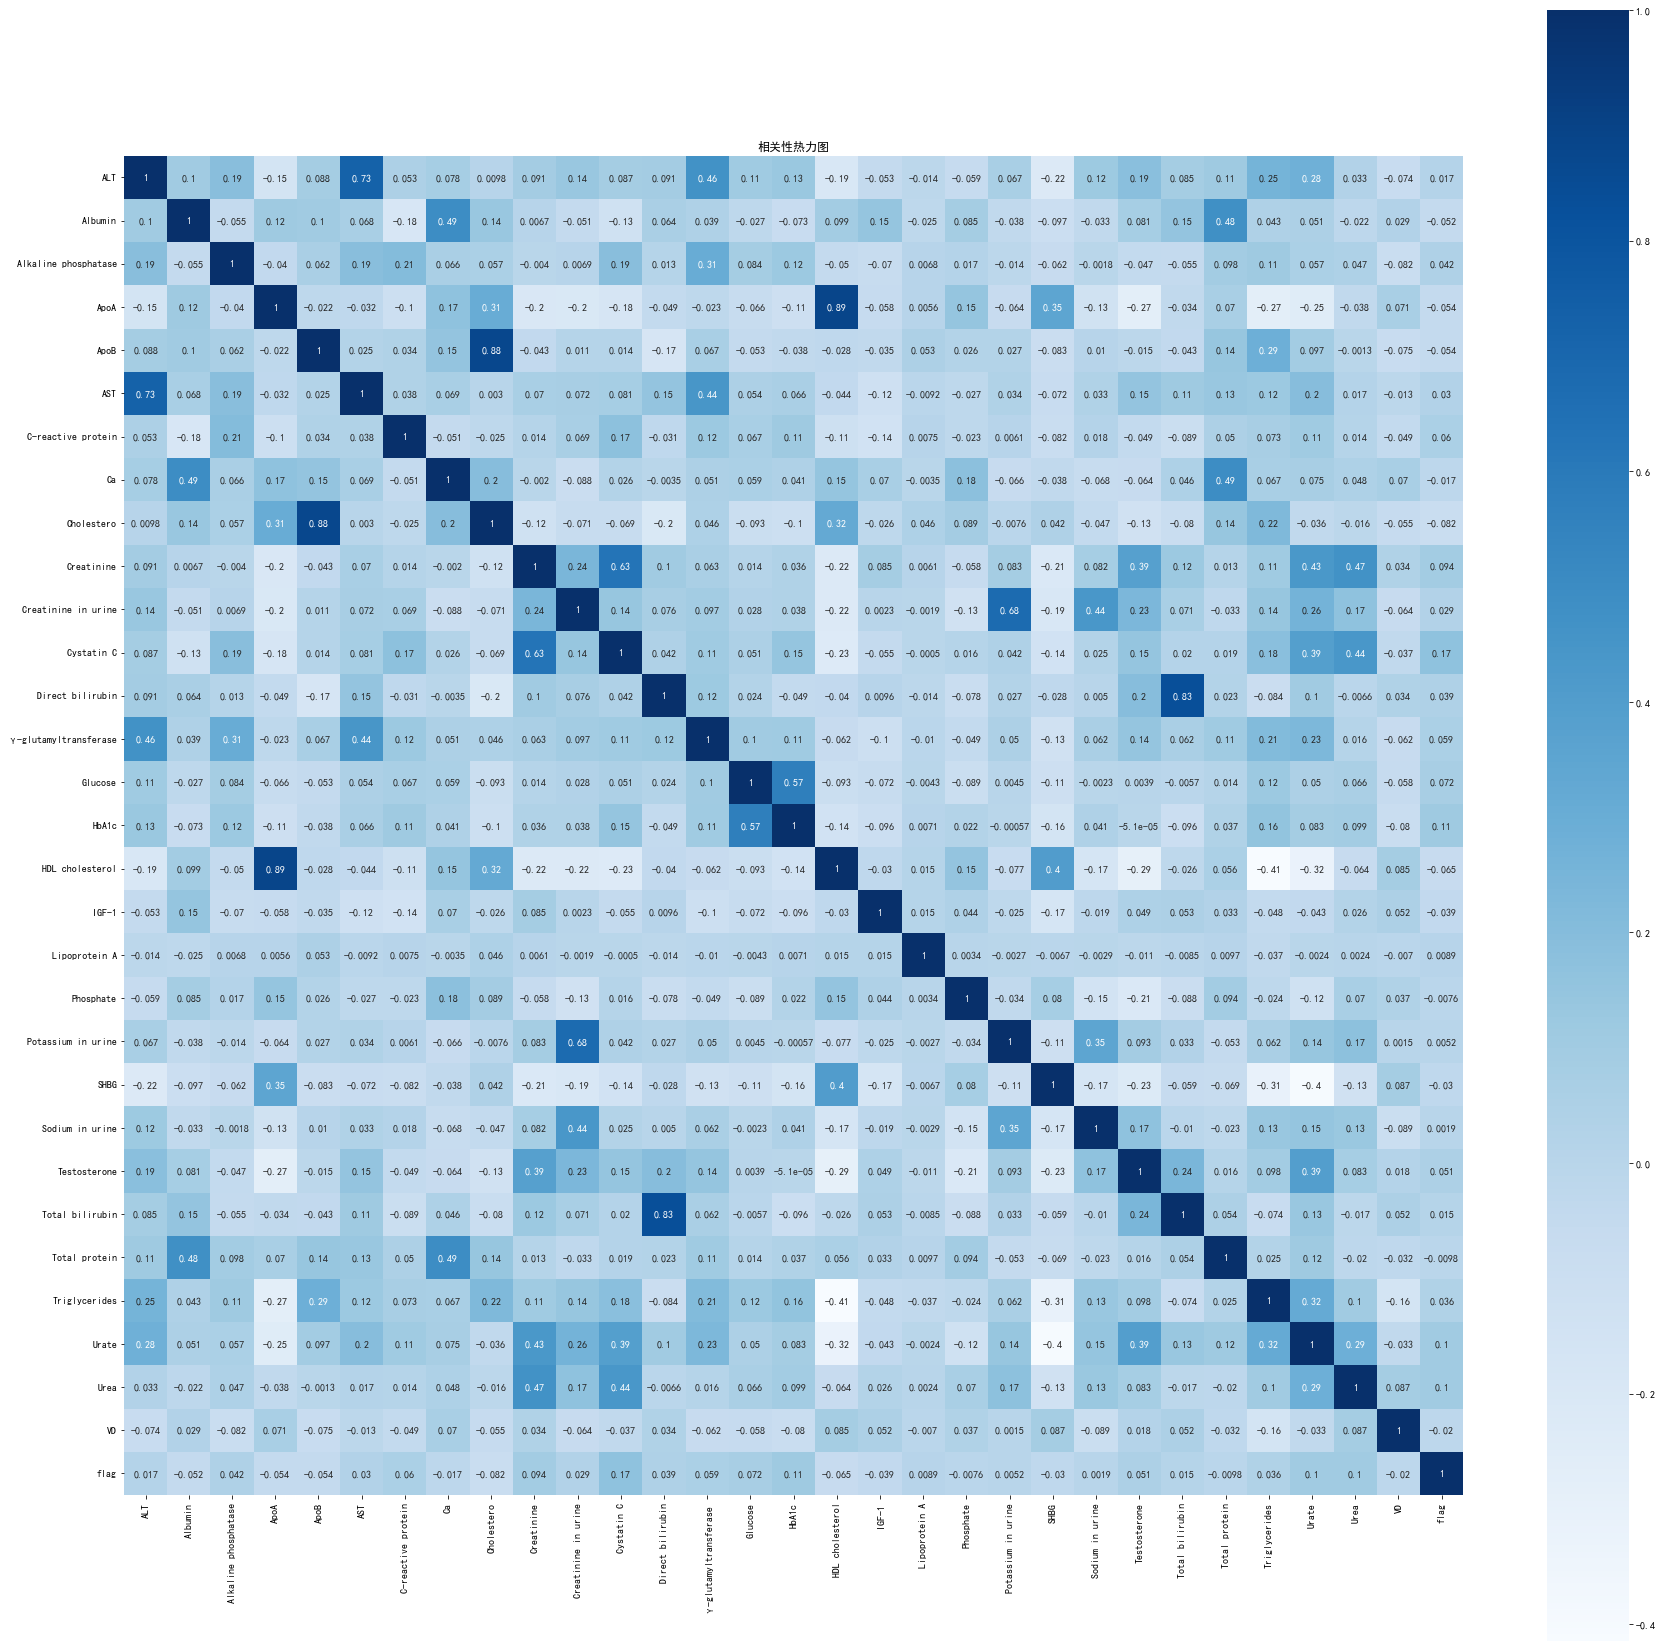

In [42]:
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False
fig, ax = plt.subplots(figsize=(30, 30),facecolor='w')
# 指定颜色带的色系
sns.heatmap(data.corr(),annot=True, vmax=1, square=True, cmap="Blues", fmt='.2g')
plt.title('相关性热力图')
plt.show()

In [89]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data, label, random_state=0)

In [91]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(train_x, train_y)

In [66]:
X_resampled['flag'].value_counts()

0    343789
1    343789
Name: flag, dtype: int64

Text(0, 0.5, 'count')

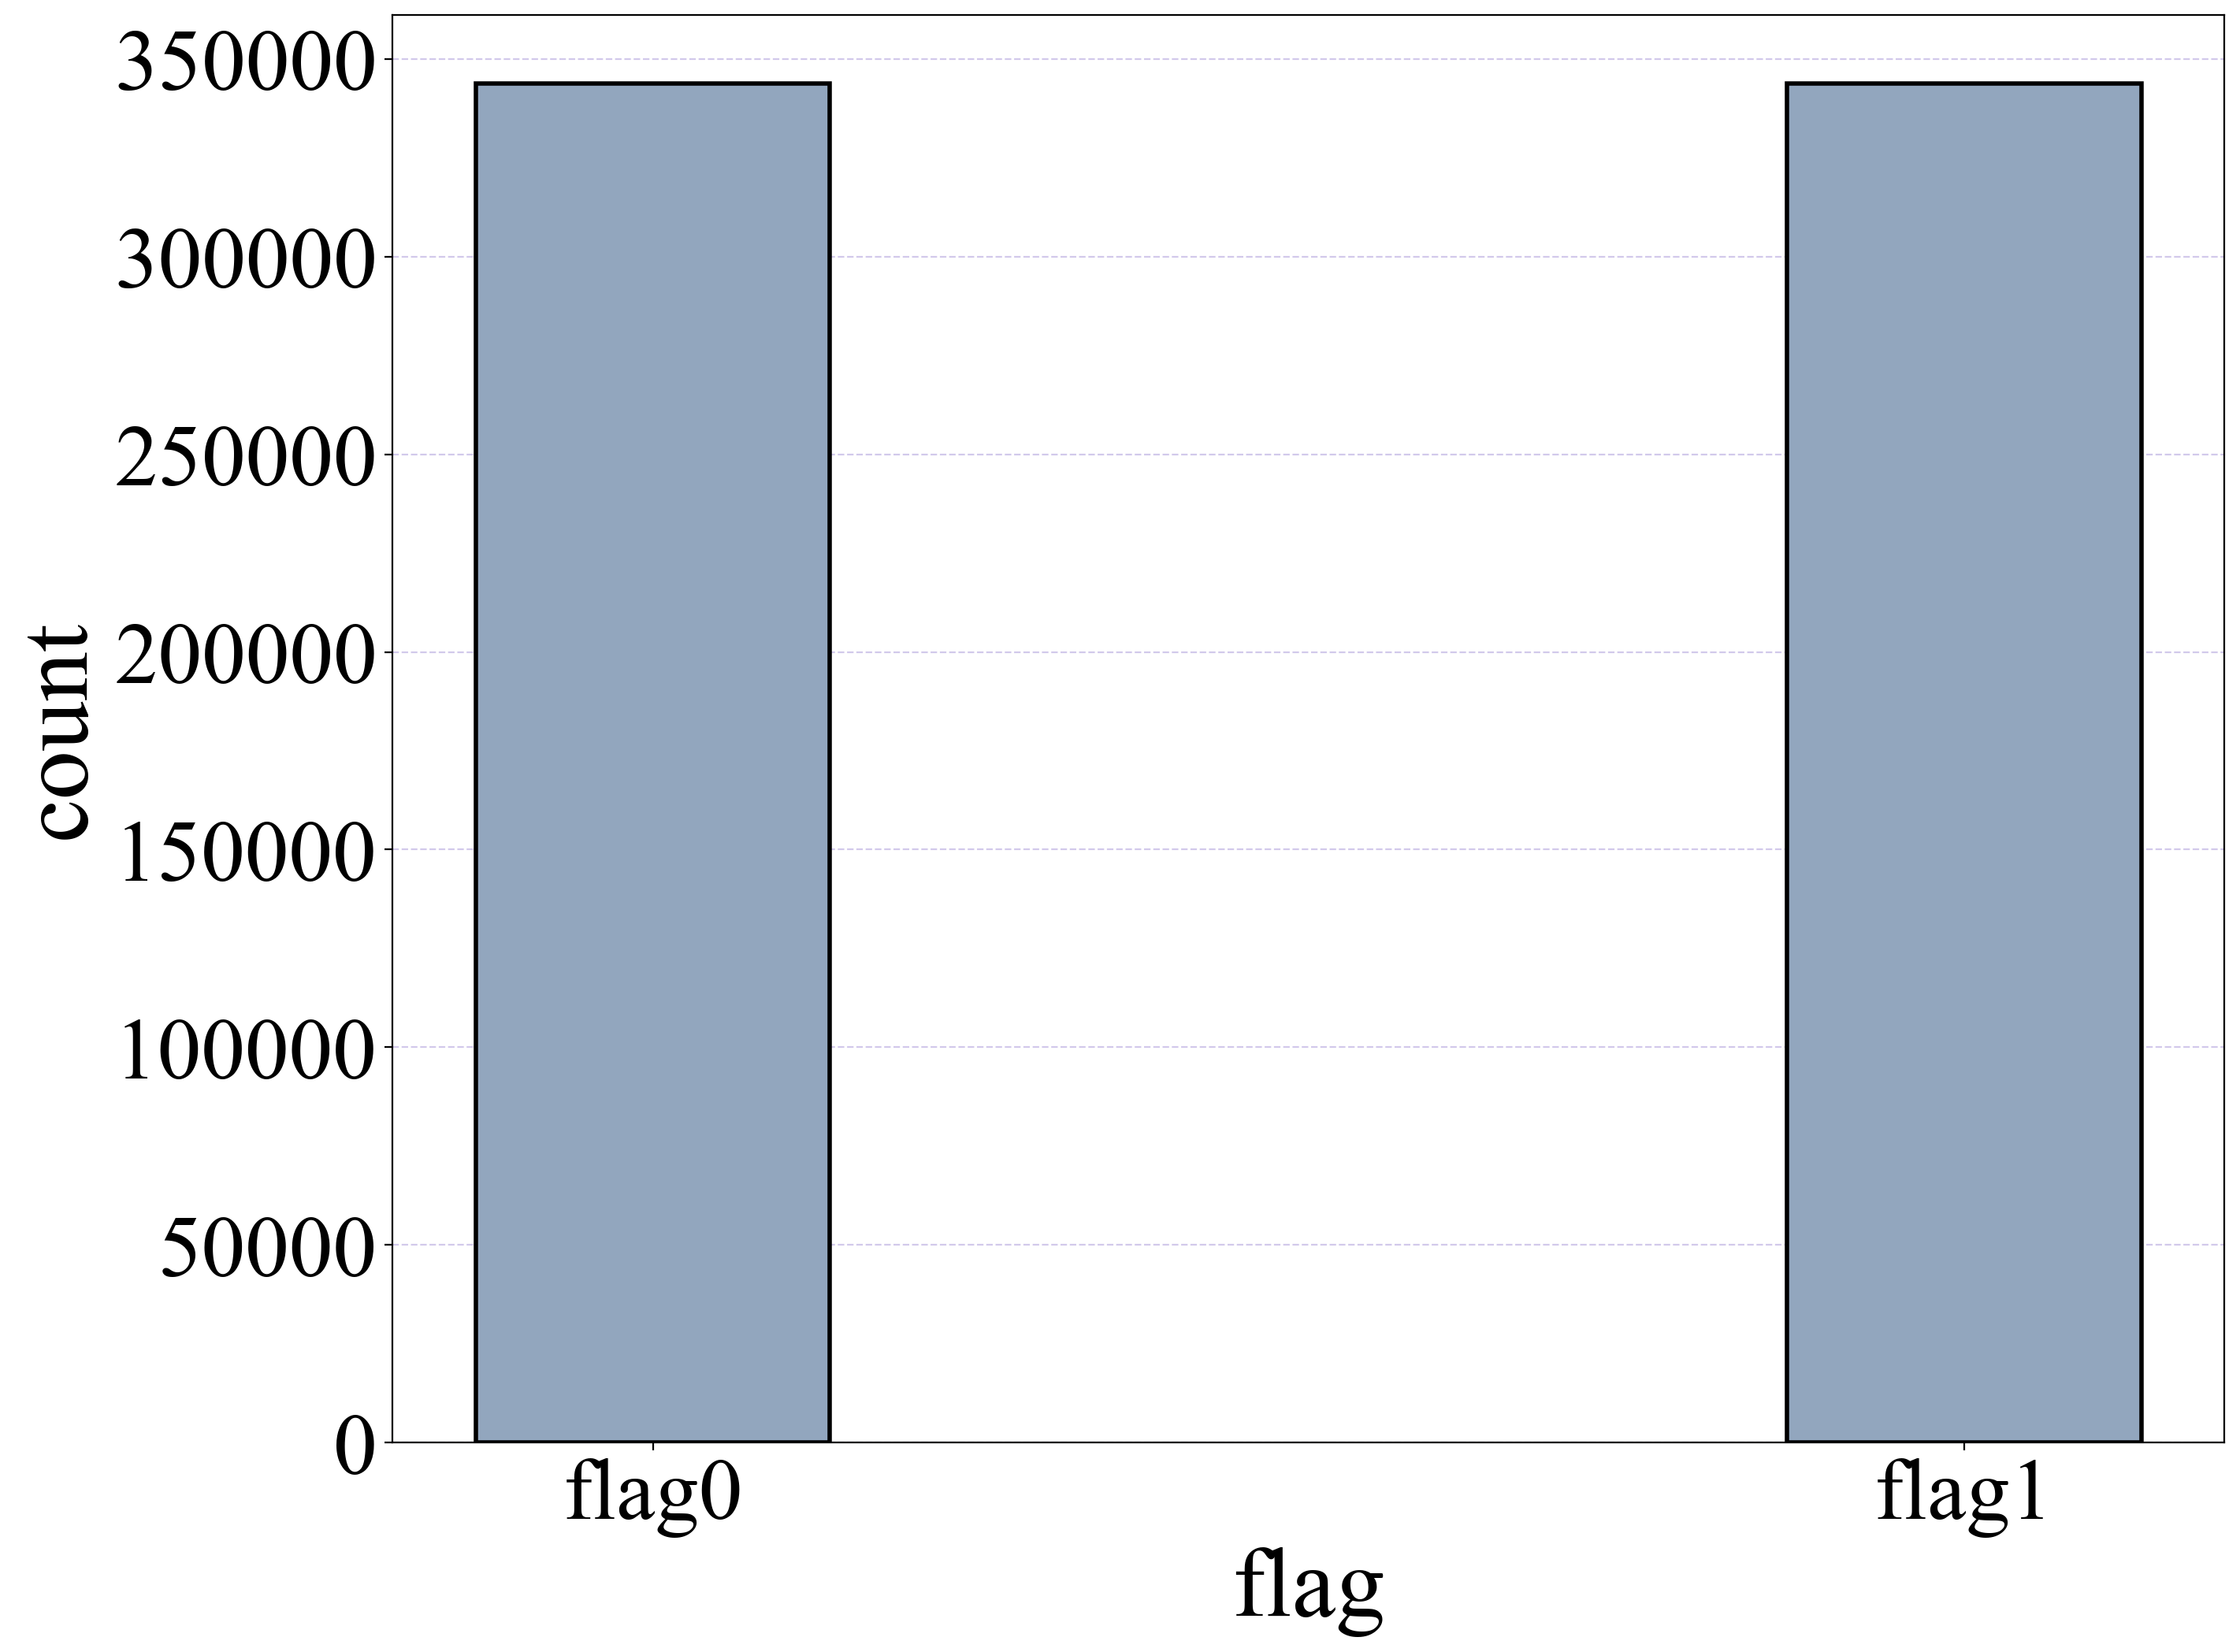

In [67]:
x=['flag0','flag1']
y=[343789,343789]

x_len = np.arange(len(x))
total_width, n = 0.9, 3
width = 0.3
xticks = x_len - (total_width - width) / 2
plt.figure(figsize=(15, 12), dpi=200)

plt.grid(axis="y", c='#d2c9eb', linestyle = '--',zorder=0)
plt.bar(xticks, y, width=0.9*width, label="Attention weights", color="#92a6be",edgecolor='black',linewidth = 2,  zorder=10)


plt.xticks(x_len-0.3, x, fontproperties='Times New Roman',fontsize = 40)
plt.yticks(fontproperties='Times New Roman',fontsize = 40)
plt.xlabel("flag", fontproperties='Times New Roman',fontsize=45)
plt.ylabel("count",fontproperties='Times New Roman', fontsize=45)

In [92]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [93]:
num_round = 100
model = XGBClassifier(max_depth=4,min_child_weight=2,subsample=0.8,colsample_bytree=0.65, gamma=0.2,learning_rate=0.1,n_estimators=150, verbosity=0, objective='binary:logistic')
model.fit(X_resampled, y_resampled)
# feature importance
kfold = StratifiedKFold(n_splits=3)
results = cross_val_score(model, X_resampled, y_resampled, cv=kfold)
print(results)
print("CV Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.72700301 0.72764002 0.72669639]
CV Accuracy: 72.71% (0.04%)


In [94]:
f1=cross_val_score(model, X_resampled, y_resampled, scoring="f1",cv=kfold)

In [95]:
print("F1-Score: %.2f%% (%.2f%%)" % (f1.mean()*100, f1.std()*100))

F1-Score: 72.70% (0.05%)


In [96]:
test_x.shape

(118955, 30)

In [99]:
model.score(test_x,test_y)

0.7293262157958892

In [100]:
s1=model.score(test_x,test_y)*100

In [104]:
print("model score:%.2f%%" % s1)
#print("F1-Score: %.2f%% (%.2f%%)" % (s2.mean()*100, s2.std()*100))
print("accuracy: %.2f%% (%.2f%%)" % (s3.mean()*100, s3.std()*100))
#print("recall: %.2f%% (%.2f%%)" % (s4.mean()*100, s4.std()*100))
print("precision: %.2f%% (%.2f%%)" % (s5.mean()*100, s5.std()*100))

from sklearn.metrics import mean_squared_error as MSE
m1=MSE(test_y,model.predict(test_x))
print("MSE:%.2f"%m1)

model score:72.93%
accuracy: 96.40% (0.01%)
precision: 48.21% (5.08%)
MSE:0.27


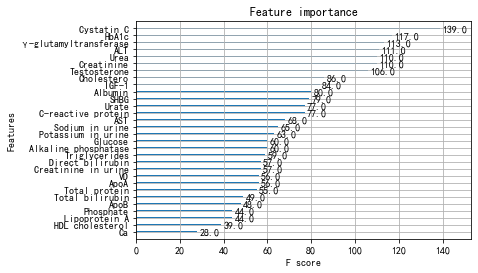

In [98]:
from matplotlib import pyplot
from xgboost import plot_importance
# plot
plot_importance(model)
pyplot.show()

In [32]:
from sklearn.metrics import mean_squared_error as MSE
MSE(test_y,model.predict(test_x))

0.26859736875288975

In [33]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
y_pred=model.predict(test_x)
recall=recall_score(test_y,y_pred)
recall

0.6548982931961655